# Cartoonizing images

## Imports

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Constants

In [47]:
MEDIAN_K = 5
LAPLACE_K = 5
THRESHOLD = 180

DIAMETER = 9
SIGMA_COLOR = 9
SIGMA_SPACE = 7

REPS = 10


## Reading the image

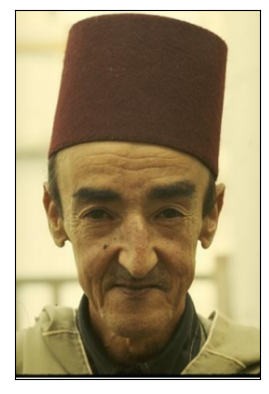

In [11]:
img = cv2.imread('img/a.png')
ax = plt.imshow(img[:,:,::-1])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()

### 1.1.1 Noise Reduction Using Median Filter

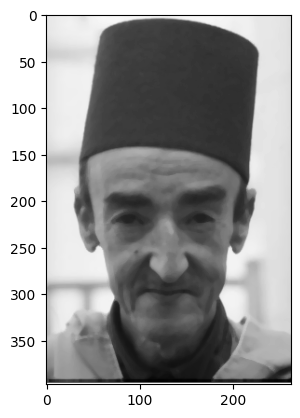

In [28]:
edg_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edg_img = cv2.medianBlur(edg_img, MEDIAN_K)
plt.imshow(edg_img, cmap='gray')
plt.show()

### 1.1.2 Edge Detection Using Laplacian Filter

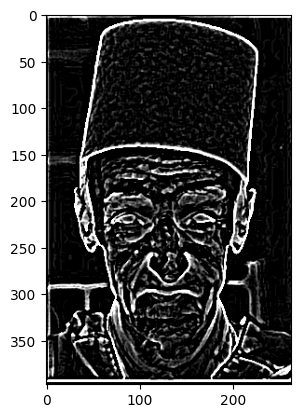

In [29]:
edg_img = cv2.Laplacian(edg_img, cv2.CV_8U, ksize=LAPLACE_K)
plt.imshow(edg_img, cmap='gray')
plt.show()

### Threshold

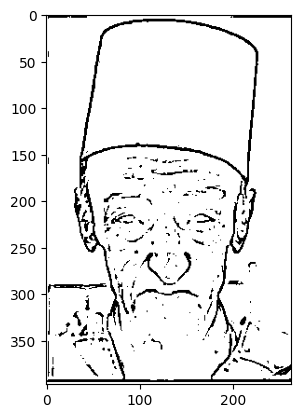

In [39]:
thr_img = cv2.threshold(edg_img, THRESHOLD, 255, cv2.THRESH_BINARY)[1]
thr_img = 255 * (thr_img == 0).astype(np.uint8)
plt.imshow(thr_img, cmap='gray')
plt.show()

## 1.2 Generating a color painting and a cartoon

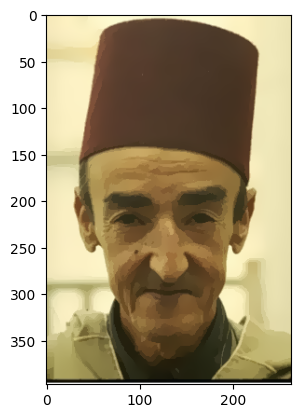

In [57]:
bi_img = cv2.bilateralFilter(img, DIAMETER, SIGMA_COLOR, SIGMA_SPACE)
for i in range(REPS):
    bi_img = cv2.bilateralFilter(bi_img, DIAMETER, SIGMA_COLOR, SIGMA_SPACE)
plt.imshow(bi_img[:,:,::-1])
plt.show()

## Final Result

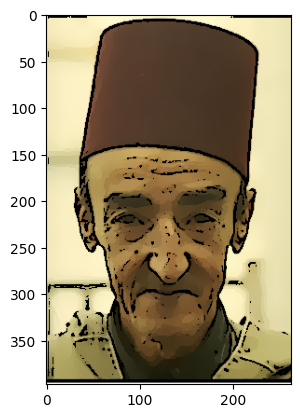

In [94]:
res = bi_img * (np.repeat(thr_img,3, axis=-1).reshape(bi_img.shape) // 255)
plt.imshow(res[:,:,::-1])
plt.show()

## Defining the steps

In [95]:
def cartoonize(path: str):
    # Read image
    img = cv2.imread(path)

    # Convert to grayscale
    edg_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edg_img = cv2.medianBlur(edg_img, MEDIAN_K)

    # Detect edges and threshold
    edg_img = cv2.Laplacian(edg_img, cv2.CV_8U, ksize=LAPLACE_K)
    edg_img = cv2.threshold(edg_img, THRESHOLD, 255, cv2.THRESH_BINARY)[1]
    edg_img = 255 * (edg_img == 0).astype(np.uint8)

    # Apply bilateral filter
    bi_img = cv2.bilateralFilter(img, DIAMETER, SIGMA_COLOR, SIGMA_SPACE)
    for i in range(REPS - 1):
        bi_img = cv2.bilateralFilter(bi_img, DIAMETER, SIGMA_COLOR, SIGMA_SPACE)

    # sketch over painting
    return bi_img * (np.repeat(edg_img,3, axis=-1).reshape(bi_img.shape) // 255)
  

In [100]:
def view(path: str):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.imread(path)[:,:,::-1])
    axs[0].axes.get_xaxis().set_visible(False)
    axs[0].axes.get_yaxis().set_visible(False)
    axs[1].imshow(cartoonize(path)[:,:,::-1])
    axs[1].axes.get_xaxis().set_visible(False)
    axs[1].axes.get_yaxis().set_visible(False)
    plt.show()

## Test on different pics

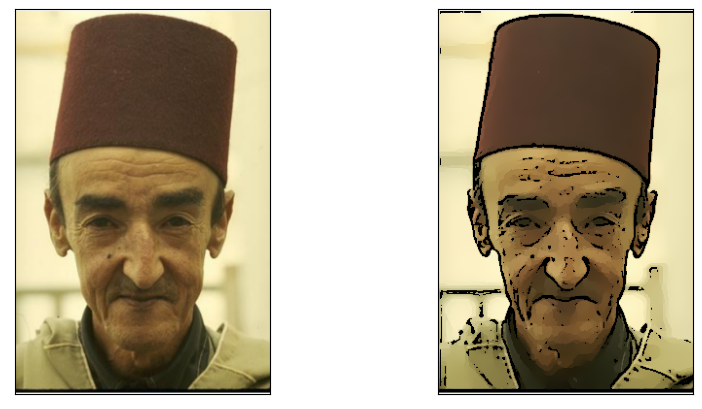

In [101]:
view('img/a.png')

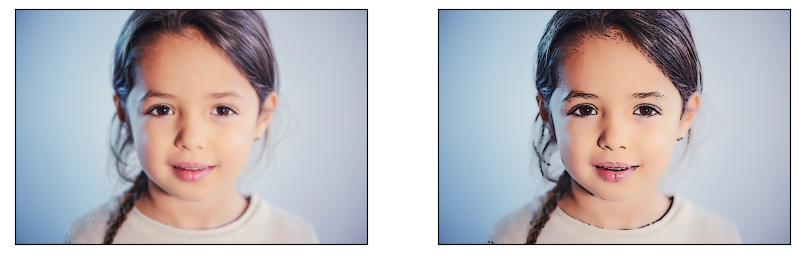

In [103]:
view('img/b.jpg')

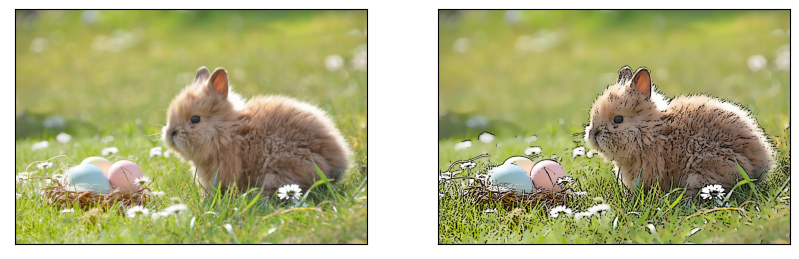

In [105]:
view('img/c.jpg')